<a href="https://colab.research.google.com/github/JoseSantisteban/Procesamiento-de-Imagenes/blob/main/Gifs_con_Distancia_Euclidiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias

In [1]:
!pip install imageio

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import Image
from IPython.display import HTML
import datetime
import math
import os
from tqdm.notebook import tqdm
import cv2


#Descargar el video desde Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
video_path = '/content/drive/MyDrive/TF - Procesamiento de imagenes/A Lovely Night.mp4'

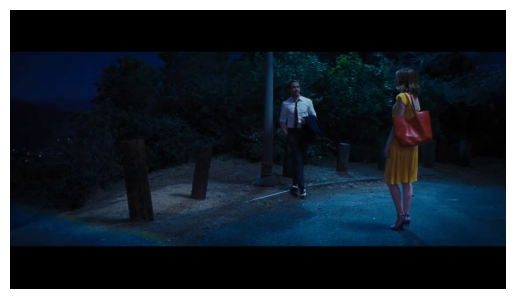

In [5]:
from moviepy.editor import VideoFileClip
video = VideoFileClip(video_path)
frame = video.get_frame(25) #fotograma de muestra

plt.imshow(frame)
plt.axis('off')
plt.show()

## Clase usada para extraer frames de un video

In [6]:
class FrameExtractor():

    def __init__(self, video_path):
        self.video_path = video_path
        self.vid_cap = cv2.VideoCapture(video_path)
        self.n_frames = int(self.vid_cap.get(cv2.CAP_PROP_FRAME_COUNT))
        self.fps = int(self.vid_cap.get(cv2.CAP_PROP_FPS))

    def get_fps(self):
        return self.fps

    def get_n_frames(self):
        return self.n_frames

    def get_video_duration(self):
        print(self.n_frames)
        print(self.fps)
        duration = self.n_frames/self.fps
        print(f'Duracion: {datetime.timedelta(seconds=duration)}')

    def description_video(self):
        print("Archivo: ", self.video_path)
        self.get_video_duration()
        print("FPS: ", self.fps)
        print("# de Frames: ", self.n_frames)

    def get_n_images(self, every_x_frame):
        n_images = math.floor(self.n_frames / every_x_frame) + 1
        print(f'Extraer cada {every_x_frame} frame resultará en {n_images} imagenes.')

    def extract_frames(self, every_x_frame, img_name, dest_path=None, img_ext = '.jpg'):
        if not self.vid_cap.isOpened():
            self.vid_cap = cv2.VideoCapture(self.video_path)

        if dest_path is None:
            dest_path = os.getcwd()
        else:
            if not os.path.isdir(dest_path):
                os.mkdir(dest_path)
                print(f'Creado el siguiente directorio para la extracción: {dest_path}')

        frame_cnt = 0
        img_cnt = 0

        filenames = []
        while self.vid_cap.isOpened():

            success,image = self.vid_cap.read()

            if not success:
                break

            if frame_cnt % every_x_frame == 0:
                img_path = os.path.join(dest_path, ''.join([img_name, '_', str(img_cnt), img_ext]))
                print('Creando', img_path)
                filenames.append(img_path)

                cv2.imwrite(img_path, image)
                img_cnt += 1

            frame_cnt += 1

        self.vid_cap.release()
        cv2.destroyAllWindows()
        return filenames

#Caracteristicas del video y extracción de frames

In [7]:
video1 = FrameExtractor(video_path)
video1.description_video()
video1.get_n_images(20)

Archivo:  /content/drive/MyDrive/TF - Procesamiento de imagenes/A Lovely Night.mp4
7197
30
Duracion: 0:03:59.900000
FPS:  30
# de Frames:  7197
Extraer cada 20 frame resultará en 360 imagenes.


In [8]:
filenames = video1.extract_frames(20, 'img_video1', 'video1')

Creado el siguiente directorio para la extracción: video1
Creando video1/img_video1_0.jpg
Creando video1/img_video1_1.jpg
Creando video1/img_video1_2.jpg
Creando video1/img_video1_3.jpg
Creando video1/img_video1_4.jpg
Creando video1/img_video1_5.jpg
Creando video1/img_video1_6.jpg
Creando video1/img_video1_7.jpg
Creando video1/img_video1_8.jpg
Creando video1/img_video1_9.jpg
Creando video1/img_video1_10.jpg
Creando video1/img_video1_11.jpg
Creando video1/img_video1_12.jpg
Creando video1/img_video1_13.jpg
Creando video1/img_video1_14.jpg
Creando video1/img_video1_15.jpg
Creando video1/img_video1_16.jpg
Creando video1/img_video1_17.jpg
Creando video1/img_video1_18.jpg
Creando video1/img_video1_19.jpg
Creando video1/img_video1_20.jpg
Creando video1/img_video1_21.jpg
Creando video1/img_video1_22.jpg
Creando video1/img_video1_23.jpg
Creando video1/img_video1_24.jpg
Creando video1/img_video1_25.jpg
Creando video1/img_video1_26.jpg
Creando video1/img_video1_27.jpg
Creando video1/img_video1_28

# Métodos para hallar la similaridad entre los frames consecutivos del video.

#### Normalización de frames [0 - 1]

In [9]:
im_array = [] #aqui estan las imagenes
for filename in tqdm(filenames):
    img = plt.imread(filename)
    im_array.append(img)

im_array = np.array(im_array) / 255.0
im_array.shape

  0%|          | 0/360 [00:00<?, ?it/s]

(360, 480, 852, 3)

#### Calcular distancia euclidiana entre dos frames consecutivos

  0%|          | 0/359 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Diferencia entre todos los pixeles de todos los frames consecutivos')

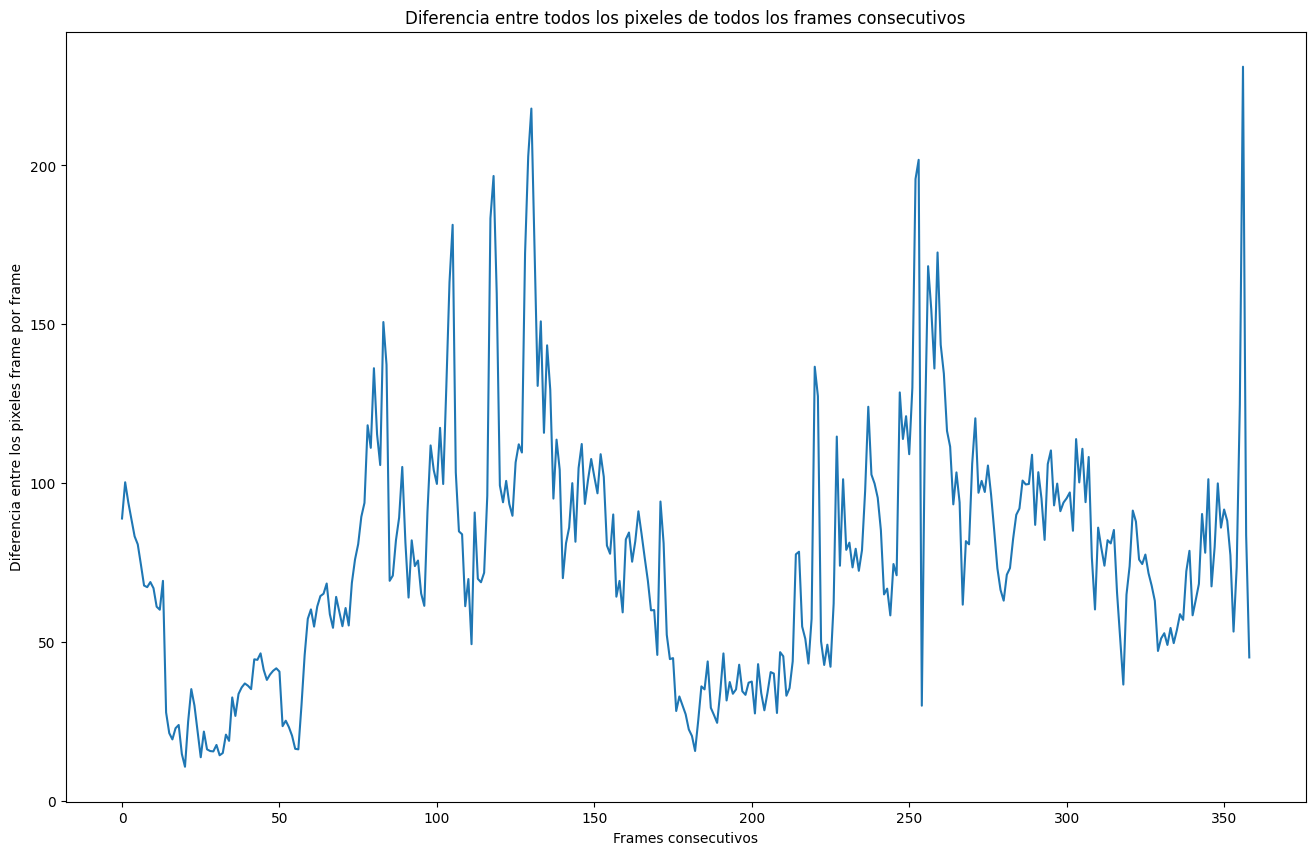

In [10]:
from sklearn.metrics.pairwise import euclidean_distances
result = []
for i in tqdm(range(len(im_array) - 1)):
  firs_img = [im_array[i].flatten()]
  second_img = [im_array[i+1].flatten()]
  aux = euclidean_distances(firs_img, second_img)
  result.append(aux[0])

plt.figure(figsize=(16,10))
plt.plot(result)
plt.xlabel("Frames consecutivos")
plt.ylabel("Diferencia entre los pixeles frame por frame")
plt.title("Diferencia entre todos los pixeles de todos los frames consecutivos")

In [11]:
print(result)

[array([88.81768167]), array([100.22820351]), array([93.86994594]), array([88.57115321]), array([83.19879363]), array([80.67842394]), array([74.31211866]), array([67.70578491]), array([67.19608862]), array([68.80000101]), array([66.86073725]), array([61.03951979]), array([60.09245254]), array([69.17762093]), array([27.72317238]), array([21.2261813]), array([19.24267652]), array([22.76211838]), array([23.78854851]), array([14.6575871]), array([10.6393147]), array([24.87127768]), array([35.08237661]), array([29.92853901]), array([21.63236145]), array([13.62529818]), array([21.70222085]), array([16.10740049]), array([15.57883352]), array([15.46175647]), array([17.4973027]), array([14.24776098]), array([14.95430487]), array([20.7438233]), array([18.78406975]), array([32.45852575]), array([26.64336872]), array([33.55746264]), array([35.60708063]), array([36.86512112]), array([36.1537379]), array([35.07662881]), array([44.4663075]), array([44.30213817]), array([46.34335092]), array([41.14309

# Resumen de video

In [12]:
import numpy as np
from scipy.spatial.distance import euclidean
from PIL import Image

def dist_euclidiana(frame1, frame2):
    return euclidean(frame1.flatten(), frame2.flatten())

def select_frames(im_array, num_frames):
    dist_frames = [dist_euclidiana(im_array[i], im_array[i+1]) for i in range(len(im_array)-1)]

    sorted_indices = sorted(range(len(dist_frames)), key=lambda i: dist_frames[i], reverse=True)

    # Selecciona frames
    selected_frames = [im_array[i] for i in set(sorted_indices[:num_frames])]
    return selected_frames

def create_gif(im_array, num_frames):
    selected_frames = select_frames(im_array, num_frames)

    gif_filename = 'video.gif'
    image_sequence = [Image.fromarray((frame * 255).astype(np.uint8)) for frame in selected_frames]
    image_sequence[0].save(gif_filename, save_all=True, append_images=image_sequence[1:], optimize=False, duration=200, loop=0)
    print(f"El GIF ha sido creado: {gif_filename}")

In [13]:
num_frames = 180 #@param {type:"slider", min:0, max:500, step:10}
create_gif(im_array, num_frames)

El GIF ha sido creado: video.gif


## Referencias

[1] E. Lewinson, "The easiest way to download YouTube videos using Python", Medium, 2020. [Online]. Available: https://towardsdatascience.com/the-easiest-way-to-download-youtube-videos-using-python-2640958318ab. [Accessed: 21- Jun- 2021].

[2] snakewalkerTK421, Dragon Ball Ending Latino HD 720p (sin créditos) [Dragon Ball Ending Latino HD 720p (sin créditos)]. 2016. [Online]. Available: https://www.youtube.com/watch?v=Cf4YU-sRRBQ&ab_channel=CaminskiTV (sin créditos)
. [Accessed: 22- May- 2023].
